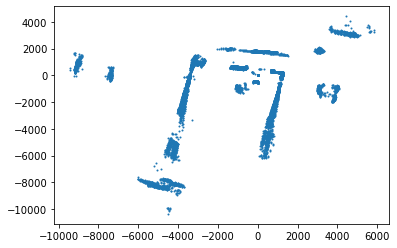

In [19]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import csv
xcoord = []
ycoord = []
coords = []
count = 0

with open('CartesianPoints.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for line in readCSV:
        # print(line)
        # print(count)
        # Needs to be optimized
        # tuple = (line[0], line[1])
        coords.append(tuple)
        xcoord.append(line[0])
        ycoord.append(line[1])
        coords.append((line[0], line[1]))
        count = count + 1
        

#print(xcoord)

# This process prevent non float values from being evaluated
# Checks for y and x in the strings
a = ['X', 'Y']
xcoord = list([float(x) for x in xcoord if x[0] not in a])
ycoord = list([float(x) for x in ycoord if x[0] not in a])

plt.scatter(xcoord,ycoord, s=1) #marker='o')
# How to save figure
plt.savefig('Hallway_Scan_Glass_Test', dpi=300, bbox_inches='tight')
plt.show()






# Collision Avoidance Algs

In [25]:
# All required imports and variables
import time, sys
import ps_drone
from time import sleep
import signal
import os
import sys
import math
import matplotlib.pyplot as plt
import numpy as np
import board
import busio
import adafruit_lsm303_accel
import adafruit_lsm303dlh_mag

i2c = busio.I2C(board.SCL, board.SDA)
mag = adadruit_lsm303dlh_mag.LSM303DLH_Mag(i2c)
accel = adafruit_lsm303_accel.LSM303_Accel(i2c)



# a completely new approach to an old issue

def FlightSystemResult():
    result = False
    flightResult = input("What is the Flight Situation")
    if(flightResult == 'Good' or flightResult == 'Standard'):
        print("The Result Variable is now true")
        result = True
    elif(FlightResult == 'Bad' or flightResult == 'Unusual'):
        print('Result False, aborting flight')
        result = False
    else:
        return result 
    return result


def FlightSystemDistanceTracker(distance):
        collisionDistance = 300 # 3 Meters = 300 Centimers       
        if(distance < collisionDistance):
            # Code for turning drone and moving in a a direction
            print("Obstacle Detected, beginnning manuever")
            #Add Movement here, manuever in 1 of 4 ways
            # Lets use a generic moveset
            droneLeft(1.5, 45)     # droneMovement (speed, angle)
            return True
        elif(distance > colllisionDistance):
            #FLight remains normal
            print("I am far enough to breathe: No issue")
            Return False
        else:
            print("Critical Error Occured") 
            return False
        # return distance, distance-collisionDistance
        return False

list = []

    
def calculateCoordinate(dist, theta, phi):
    x = dist * math.cos((math.pi/2) - phi)
    y = dist * math.sin((math.pi/2) - phi) 
    tuple = (x, y)
    list.append(tuple)

# magnetomter data
# a list of mag data 
def magData(magnetomerData):
    magnetometerData = magnetometerData[1:-1]
    x, y, z = magnetometerData.split(',')
    return x, y, z


# Acceleromter Reading Data
def accelData(mag_x,mag_y,mag_z):
    # X, Y, and Z acceleration information
    accel_x = accel.acceleration[0]
    accel_y = accel.acceleration[1]
    accel_y = accel.acceleration[2]
    
    
    # Magnetomter Information
    mag_x = float(mag_x)
    mag_y = float(mag_y)
    mag_z = float(mag_z)
    
    try:
        thetaAcc = math.pi - math.asin(accel_z/g)
        phiAcc = math.atan2(mag_y,mag_z)
        return thetaAcc, phiAcc
    # For a bad/false reading
    except ValueError:
        return 0,0



# Emergency land for the Drone, must be done in terminal
def exit_gracefully(signal, frame):
    drone.shutdown()
signal.signal(signal.SIGQUIT, exit_gracefully)


# Get position information from UAV
def droneLocation(dist,mag_x,mag_y,mag_z):
    theta, pi = accelData(mag_x,mag_y,mag_z)
    x = dist * math.cos((math.pi/2) - phi)
    y = dist * math.sin((math.pi/2) - phi)
    droneTuple = (x,y)
    return droneTuple

# Lets create a Line Edge and APF function
# Collision Avoidance Hand Book (CAHB)
class CAHB:
    collisionStatus = 0
    
    def lineEdgeDetector(collisionStatus):
        # Take in values to redefine the value of collisionStatus
        # collisionStatus = the distance to the obstacle
        # This distance will calculated alongside a temporary collection

def onBoardFlightSystem(Switch):
    if(Switch == True):
        # Trigger all functions from this function with all relevant information
        print("Initializing")
        drone = ps_drone.Drone()   # Initialize the PS-DRONE-API
        print("Starting")
        drone.startup()            # Connect to drone and start subprocesses
        print("Resetting")
        drone.reset()
        # Wait until Drone completes its reset
        while drone.getBattery()[0] == -1: 
            time.sleep(0.1)
        # Get Drones Battery Status
            print("Battery: " + str(drone.getBattery()[0]) + "% " + str(drone.getBattery()[1])) 
            drone.useDemoMode(False)
        # Packets that will be decoded
            drone.getNDpackage(["demo", "pressure_raw", "altitude", "magneto", "wifi", "wind_speed", "euler_angles"])
            time.sleep(0.5)

        # i is the number of the data points to be captured in point cloud, choosen randomly
        i = 50
        j = 0 
    
        while i > 0:
        # Reads terminal program information for the TFMini (Python2 Programm TFMINI.py)
            distanceStr = os.popen('./tfminiTEST.py').read()
            magnetometerData = str(drone.NavData["magneto"][0])
            mag_x, mag_y, mag_z = magData(magnetomterData)
    
        # Gravity
            g = 9.81
            k = 0
        while k < 1:
            theta, phi = accelData(mag_x, mag_y, mag_z)
            k = k + 1
            break
        
        # Only uses the measurements when all three (distance, theta, phi) are all valid
        if len(distanceStr) > 1 and distanceStr != "65535" and theta != "0" and phi != "0":
            distSplit = distanceStr.split("\n")[0]
            distance = float(distSplit)
        # Exception Handling for when there is no acc[1], when no value is captured for phi 
            print(j)
            j = j + 1
            calculateCoordinates(distance, theta, phi)
        i = i - 1
    
        # Coordinates of the front of the UAV
        dist_drone_to_lidar = 5
        magnetometerData = str(drone.NavData["magneto"][0])
        mag_x, mag_y, mag_z = magData(magnetometerData)
        droneTuple = droneLocation(dist_drone_to_lidar, mag_x, mag_y, mag_z)
        
                
    return 0



# This will setup for later function call, needs no parameters
flightSys = FlightSystemResult()


# Trigger for main function that handles entire program, this can be done away with after testing
switcher = FlightSystemDistanceTracker(UAV_distance)

# Main function for this program
# Assignment of function to variable might be necessary
onBoardFlightSysterm(switcher)


ModuleNotFoundError: No module named 'ps_drone'